In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2024-08-27 16:51:42--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2024-08-27 16:51:42 (7.86 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                 parse_dates=['Date'],
                 index_col=['Date'])

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns={'Closing Price (USD)': 'price'})

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import csv
from datetime import datetime

In [ ]:
timesteps =[]
btc_prices = []
with open('BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 'r') as f:
  csv_reader = csv.reader(f, delimiter=',')
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], '%Y-%m-%d'))
    btc_prices.append(float(line[2]))

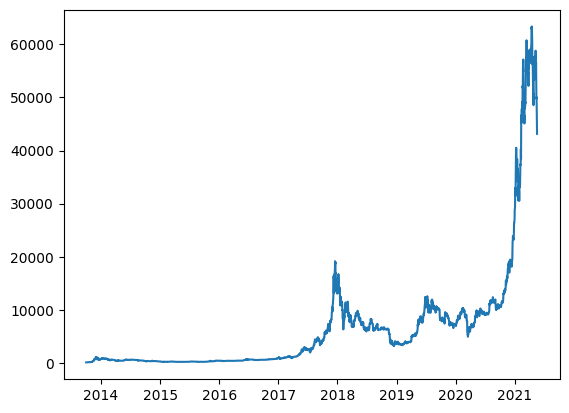

In [ ]:
plt.plot(timesteps, btc_prices)

### Creating training and tests sets

In [ ]:
split_size = int(0.8* len(btc_prices))

X_train, y_train = timesteps[:split_size], btc_prices[:split_size]
X_test, y_test = timesteps[split_size:], btc_prices[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2229, 2229, 558, 558)

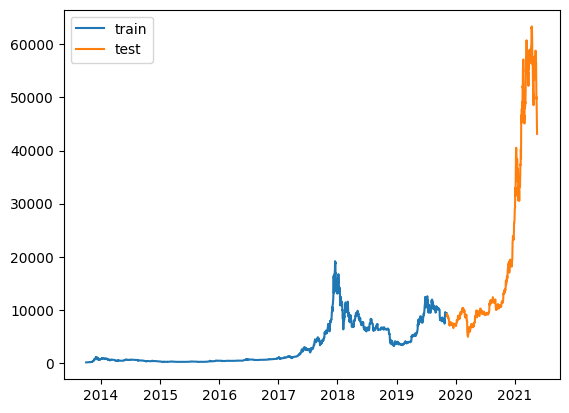

In [ ]:
plt.plot(X_train, y_train, label='train')
plt.plot(X_test, y_test, label='test')
plt.legend()

In [ ]:
def plot_time_series (timesteps, values, format='.', start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel('Time')
  plt.ylabel('Btc Price')
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

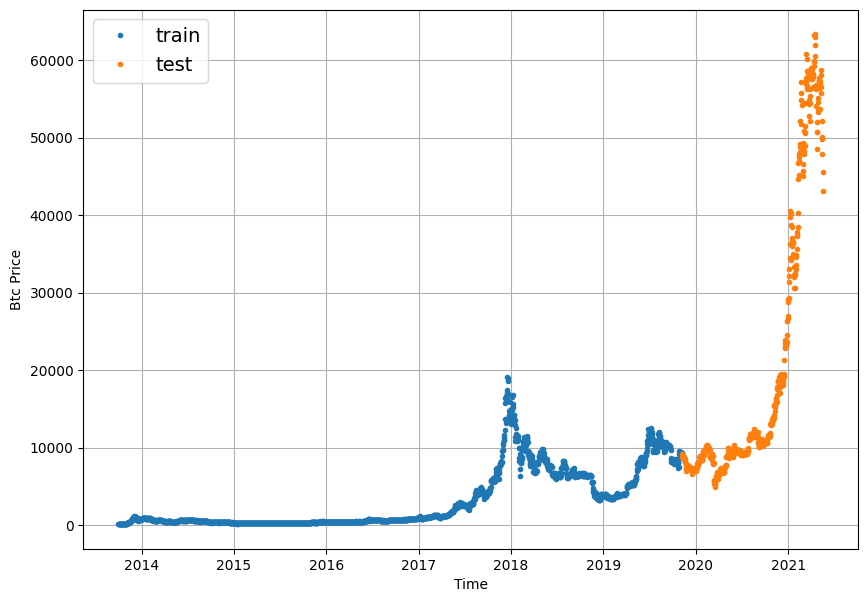

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(X_train, y_train, label='train')
plot_time_series(X_test, y_test, label='test')

## Model 0

### creating a naive forecast as a baseline

In [ ]:
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

([9226.4858208826,
  8794.3586445233,
  8798.0420546256,
  9081.1868784913,
  8711.5343391679,
  8760.8927181435,
  8749.520591019,
  8656.970922354,
  8500.6435581622,
  8469.2608988992],
 [57107.1206718864,
  58788.2096789273,
  58102.1914262342,
  55715.5466512869,
  56573.5554719043,
  52147.8211869823,
  49764.1320815975,
  50032.6931367648,
  47885.6252547166,
  45604.6157536131])

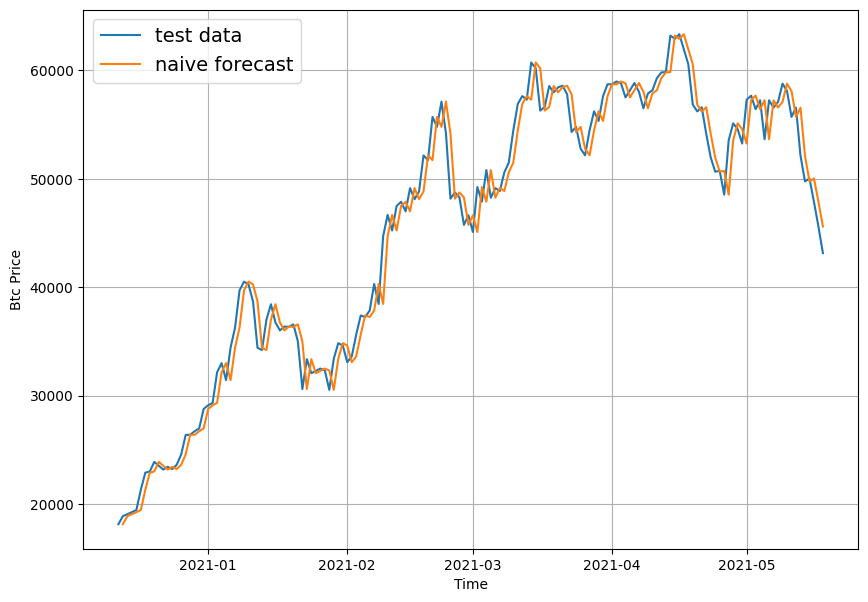

In [ ]:
plt.figure(figsize=(10,7))
#plot_time_series(X_train, y_train, label='train data')
plot_time_series(X_test, y_test, start = 400, label='test data', format='-')
plot_time_series(X_test[1:], naive_forecast, start = 400,  label='naive forecast', format='-')

## Evaluating a time series model

In [ ]:
import tensorflow as tf

In [ ]:
import tf_keras

In [ ]:
def mean_absolute_scaled_error(y_true, y_pred):
  mae = tf.reduce_mean(tf.abs(np.array(y_true) - np.array(y_pred)))
  mae_naive_no_season = tf.reduce_mean(tf.abs(np.array(y_true[1:]) - np.array(y_true[:-1])))
  return mae/mae_naive_no_season

In [ ]:
mean_absolute_scaled_error(y_test[1:], naive_forecast).numpy()

0.9995699939182624

In [ ]:
def evaluate_preds(y_true, y_pred):
  y_true = np.array(tf.cast(y_true, dtype=tf.float32))
  y_pred = np.array(tf.cast(y_pred, dtype=tf.float32))

  mae = tf_keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf_keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf_keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {'mae': mae.numpy(),
          'mse': mse.numpy(),
          'rmse': rmse.numpy(),
          'mape': mape.numpy(),
          'mase': mase.numpy()}




In [ ]:
naive_results = evaluate_preds(y_test[1:], naive_forecast)
naive_results


{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
def get_labelled_windows(x, horizon=HORIZON):
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[7]], dtype=int32)>)

In [ ]:
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon -1)), axis=0).T

  windowed_array = np.array(x)[window_indexes.astype(int)]

  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(btc_prices)
for i in range(3):
  print(f'window: {full_windows[i-3]} -> label: {full_labels[i-3]}')

window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> label: [47885.62525472]
window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> label: [45604.61575361]
window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> label: [43144.47129086]


In [ ]:
def make_train_test_splits(windows, labels, test_split=0.2):
  split_size = int((1-test_split)*len(windows))

  train_windows = windows[:split_size]
  train_labels = labels[:split_size]

  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

### modeling a checkpoint callback

In [ ]:
import os

In [ ]:
def create_model_checkpoint(model_name, save_path='model_experiments'):
  return tf_keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0,
                                            save_best_only=True)

## Model 1: dense model window=7 and horizon=1

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
tf.random.set_seed(42)

model_1 = tf_keras.Sequential([
    tf_keras.layers.Dense(128, activation='relu'),
    tf_keras.layers.Dense(HORIZON, activation='linear'),
], name = 'model_1_dense')

model_1.compile(loss='mae',
                optimizer=tf_keras.optimizers.Adam(),
                metrics=['mae', 'mse'])

model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]
            )

Epoch 1/100
18/18 [==============================] - 2s 62ms/step - loss: 1318.9952 - mae: 1318.9952 - mse: 5877190.5000 - val_loss: 1685.3236 - val_mae: 1685.3236 - val_mse: 7729084.0000
Epoch 2/100
18/18 [==============================] - 0s 7ms/step - loss: 324.5399 - mae: 324.5399 - mse: 417537.3438 - val_loss: 1734.2979 - val_mae: 1734.2979 - val_mse: 7138789.5000
Epoch 3/100
18/18 [==============================] - 1s 35ms/step - loss: 206.7916 - mae: 206.7916 - mse: 213383.0000 - val_loss: 1129.3473 - val_mae: 1129.3473 - val_mse: 3649583.7500
Epoch 4/100
18/18 [==============================] - 0s 27ms/step - loss: 178.6544 - mae: 178.6544 - mse: 164889.2188 - val_loss: 982.9543 - val_mae: 982.9543 - val_mse: 3123858.5000
Epoch 5/100
18/18 [==============================] - 0s 24ms/step - loss: 173.8369 - mae: 173.8369 - mse: 162459.2812 - val_loss: 982.6293 - val_mae: 982.6293 - val_mse: 3058960.0000
Epoch 6/100
18/18 [==============================] - 0s 26ms/step - loss: 168

In [ ]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 11ms/step - loss: 650.9136 - mae: 650.9136 - mse: 1338470.7500


[650.91357421875, 650.91357421875, 1338470.75]

In [ ]:
model_1 = tf_keras.models.load_model('model_experiments/model_1_dense/')
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 565.8850 - mae: 565.8850 - mse: 1158168.6250


[565.885009765625, 565.885009765625, 1158168.625]

In [ ]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [ ]:
model_1_preds = make_preds(model_1, test_windows)
model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8877.902, 8810.569, 9049.411, 8777.737, 8778.108, 8769.221,
       8692.511, 8535.299, 8494.407, 8542.457], dtype=float32)>

In [ ]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                               y_pred=model_1_preds)


In [ ]:
model_1_results

{'mae': 565.88495,
 'mse': 1158168.6,
 'rmse': 1076.1825,
 'mape': 2.5242145,
 'mase': 0.99410313}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

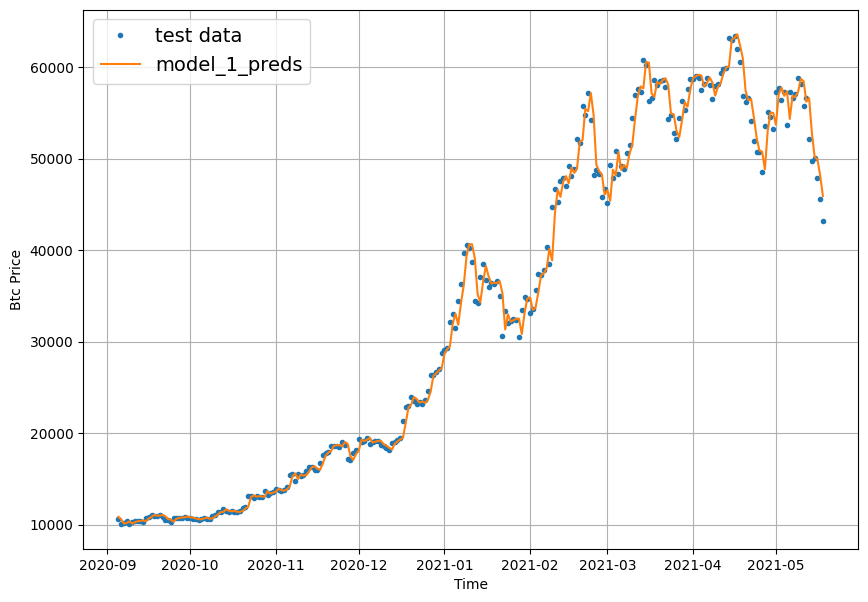

In [ ]:
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:,0], start=offset, label='test data')
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, label='model_1_preds', format='-')

## Model 2 window 30 and horizon 1

In [ ]:
HORIZON = 1
WINDOW_SIZE = 30

In [ ]:
full_windows, full_labels = make_windows(btc_prices,window_size=WINDOW_SIZE, horizon=HORIZON)
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

In [ ]:
tf.random.set_seed(42)

model_2 = tf_keras.Sequential([
    tf_keras.layers.Dense(128, activation='relu'),
    tf_keras.layers.Dense(HORIZON)],name='model_2_dense')

model_2.compile(loss='mae',
                optimizer=tf_keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs = 100,
            batch_size = 128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_2.name)])

In [ ]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 689.9699


689.9699096679688

In [ ]:
model_2 = tf_keras.models.load_model('model_experiments/model_2_dense/')
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 617.2590


617.2589721679688

In [ ]:
model_2_preds = make_preds(model_2, input_data=test_windows)

18/18 [==============================] - 0s 2ms/step


In [ ]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                               y_pred=model_2_preds)
model_2_results

{'mae': 617.259,
 'mse': 1280375.0,
 'rmse': 1131.5365,
 'mape': 2.752904,
 'mase': 1.0789747}

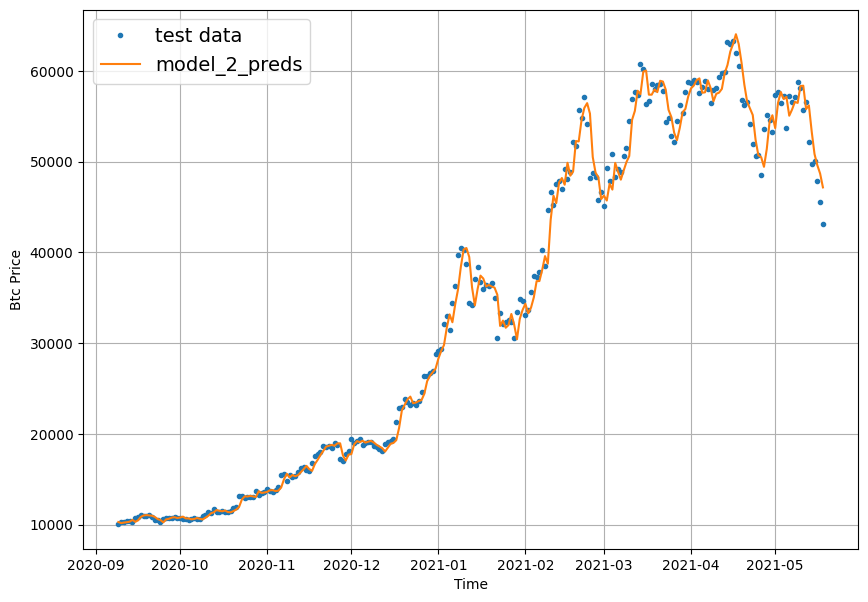

In [ ]:
offset=300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:,0], start=offset, label='test data')
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, label='model_2_preds', format='-')

## Model 3 horizon 7 window 30

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(btc_prices,window_size=WINDOW_SIZE, horizon=HORIZON)
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

In [ ]:
tf.random.set_seed(42)

model_3 = tf_keras.Sequential([
    tf_keras.layers.Dense(128, activation='relu'),
    tf_keras.layers.Dense(HORIZON)
], name='model_3_dense')

model_3.compile(loss='mae',
                optimizer=tf_keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_3.name)])

In [ ]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1408.8739


1408.8739013671875

In [ ]:
model_3 = tf_keras.models.load_model('model_experiments/model_3_dense/')
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 6ms/step - loss: 1195.1819


1195.181884765625

In [ ]:
def evaluate_preds(y_true, y_pred):
  y_true = np.array(tf.cast(y_true, dtype=tf.float32))
  y_pred = np.array(tf.cast(y_pred, dtype=tf.float32))

  mae = tf_keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf_keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf_keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {'mae': mae.numpy(),
          'mse': mse.numpy(),
          'rmse': rmse.numpy(),
          'mape': mape.numpy(),
          'mase': mase.numpy()}


In [ ]:
model_3_preds = make_preds(model_3, input_data=test_windows)
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                               y_pred=model_3_preds)
model_3_results

18/18 [==============================] - 0s 4ms/step


{'mae': 1195.1819,
 'mse': 5079772.0,
 'rmse': 1383.2123,
 'mape': 5.411549,
 'mase': 2.126759}

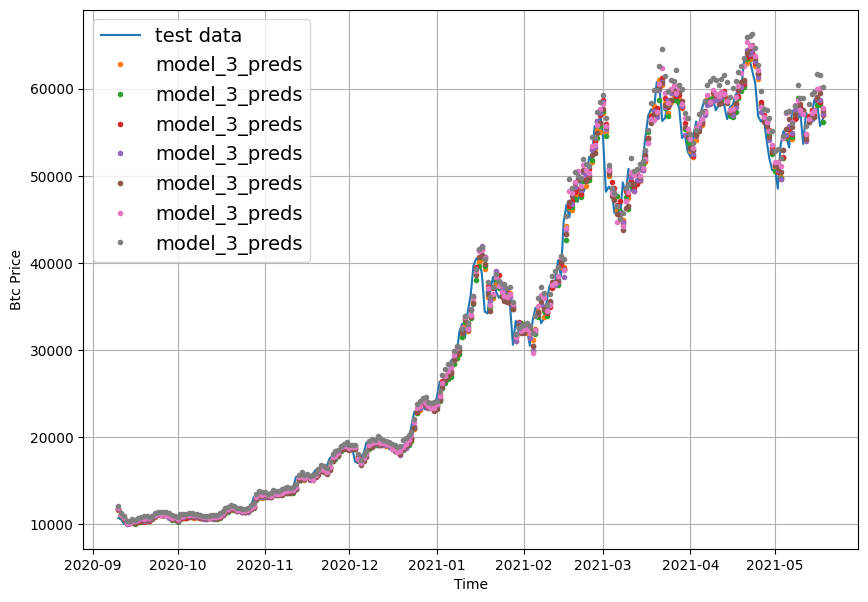

In [ ]:
offset=300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:,0], start=offset, label='test data', format='-')
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label='model_3_preds')

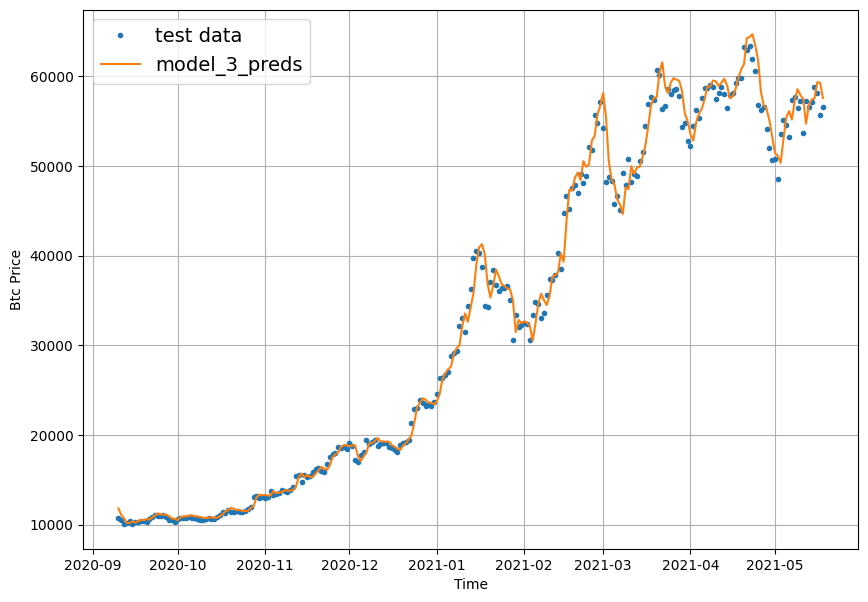

In [ ]:
offset=300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:,0], start=offset, label='test data')
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 start=offset,
                 label='model_3_preds',
                 format='-')

<Axes: >

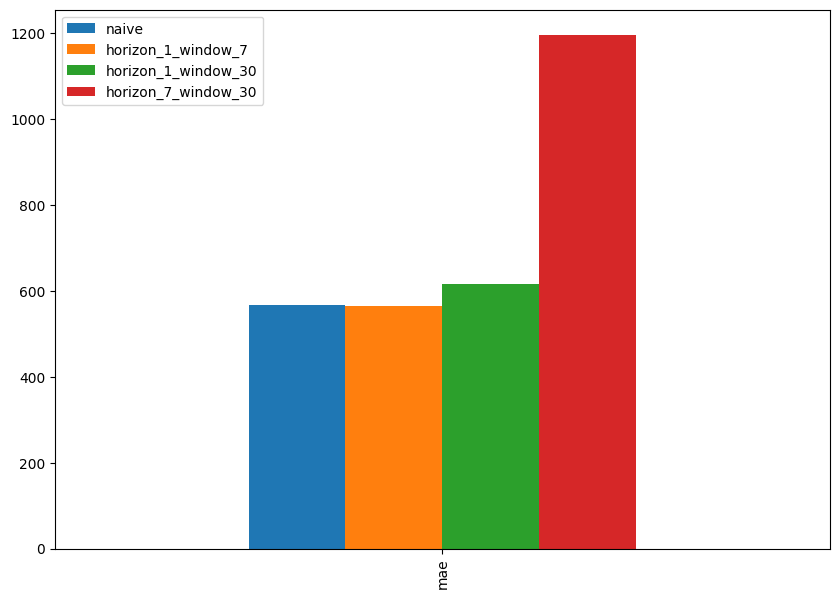

In [ ]:
pd.DataFrame({'naive': naive_results['mae'],
              'horizon_1_window_7':model_1_results['mae'],
              'horizon_1_window_30': model_2_results['mae'],
              'horizon_7_window_30': model_3_results['mae']}, index= ['mae']).plot(figsize=(10,7), kind='bar')

## Model 4 Conv1D

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

full_windows, full_labels = make_windows(btc_prices,window_size=WINDOW_SIZE, horizon=HORIZON)
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

In [ ]:
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [ ]:
expand_dims_layers = tf_keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))


In [ ]:
print(f'x.shape: {x.shape}')
x = expand_dims_layers(x)
print(f'x.shape: {x.shape}')

x.shape: (7,)
x.shape: (7, 1)


In [ ]:
tf.random.set_seed(42)

model_4 = tf_keras.models.Sequential([
    tf_keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    tf_keras.layers.Conv1D(filters=128, kernel_size=5, strides=1, padding='causal', activation='relu'),
    tf_keras.layers.Dense(HORIZON)
], name = 'model_4_conv_1D')

model_4.compile(loss='mae',
                optimizer=tf_keras.optimizers.Adam())

model_4.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            validation_data=(test_windows,test_labels),
            callbacks = [create_model_checkpoint(model_name=model_4.name)] )

In [ ]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 703.7168


703.716796875

In [ ]:
model_4 = tf_keras.models.load_model('model_experiments/model_4_conv_1D/')
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 561.9261


561.9260864257812

In [ ]:
model_4_preds = make_preds(model_4, input_data=test_windows)
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                               y_pred=model_4_preds)
model_4_results

18/18 [==============================] - 0s 5ms/step


{'mae': 561.92615,
 'mse': 1151077.1,
 'rmse': 1072.8826,
 'mape': 2.5098252,
 'mase': 0.9871486}

## Model 5: RNN LSTM

In [ ]:
tf.random.set_seed(42)

inputs = tf_keras.layers.Input(shape=(WINDOW_SIZE))
x = tf_keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
#x = tf_keras.layers.LSTM(128, return_sequences=True)(x)
x = tf_keras.layers.LSTM(128, activation='relu')(x)
#x = tf_keras.layers.Dense(32, activation='relu')(x)
outputs = tf_keras.layers.Dense(HORIZON)(x)

model_5 = tf_keras.models.Model(inputs, outputs, name='model_5_LSTM')

model_5.compile(loss='mae',
                optimizer=tf_keras.optimizers.Adam())

model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            validation_data=(test_windows,test_labels),
            callbacks=create_model_checkpoint(model_name=model_5.name))

Epoch 1/100
70/70 [==============================] - 4s 27ms/step - loss: 1494.2404 - val_loss: 1235.5787
Epoch 2/100
70/70 [==============================] - 2s 23ms/step - loss: 189.8428 - val_loss: 1092.4254
Epoch 3/100
70/70 [==============================] - 2s 24ms/step - loss: 182.7937 - val_loss: 1062.7246
Epoch 4/100
70/70 [==============================] - 0s 6ms/step - loss: 186.0642 - val_loss: 1086.8719
Epoch 5/100
70/70 [==============================] - 2s 24ms/step - loss: 176.1588 - val_loss: 1045.4519
Epoch 6/100
70/70 [==============================] - 2s 28ms/step - loss: 172.5428 - val_loss: 1038.2511
Epoch 7/100
70/70 [==============================] - 3s 40ms/step - loss: 169.2196 - val_loss: 1004.6074
Epoch 8/100
70/70 [==============================] - 2s 24ms/step - loss: 165.6060 - val_loss: 906.2845
Epoch 9/100
70/70 [==============================] - 0s 5ms/step - loss: 161.4586 - val_loss: 907.9752
Epoch 10/100
70/70 [==============================] - 2s 2

In [ ]:
model_5 = tf_keras.models.load_model('model_experiments/model_5_LSTM/')
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 565.9321


565.93212890625

In [ ]:
model_5_preds = make_preds(model_5, input_data=test_windows)
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                               y_pred=model_5_preds)
model_5_results

18/18 [==============================] - 0s 4ms/step


{'mae': 565.9321,
 'mse': 1167504.6,
 'rmse': 1080.5112,
 'mape': 2.5411472,
 'mase': 0.994186}

## Making a Multivariate time series dataset

In [ ]:
bitcoin_prices.head()

,price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
block_reward_1 = 50 #3 january 2009
block_reward_2 = 25 #8 nov 2012
block_reward_3 = 12.5 #9 july 2016
block_reward_4 = 6.25 #18 may 20

block_reward_2_datetime = np.datetime64('2012-11-08')
block_reward_3_datetime = np.datetime64('2016-07-09')
block_reward_4_datetime = np.datetime64('2020-05-18')

In [ ]:
block_rewards_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_rewards_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_rewards_2_days, block_rewards_3_days

(1012, 2421)

In [ ]:
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block['block_reward'] = None

bitcoin_prices_block.iloc[:block_rewards_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_rewards_2_days:block_rewards_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_rewards_3_days:, -1] = block_reward_4
bitcoin_prices_block.head(), bitcoin_prices_block.tail()

(                price block_reward
 Date                              
 2013-10-01  123.65499           25
 2013-10-02  125.45500           25
 2013-10-03  108.58483           25
 2013-10-04  118.67466           25
 2013-10-05  121.33866           25,
                    price block_reward
 Date                                 
 2021-05-14  49764.132082         6.25
 2021-05-15  50032.693137         6.25
 2021-05-16  47885.625255         6.25
 2021-05-17  45604.615754         6.25
 2021-05-18  43144.471291         6.25)

<Axes: xlabel='Date'>

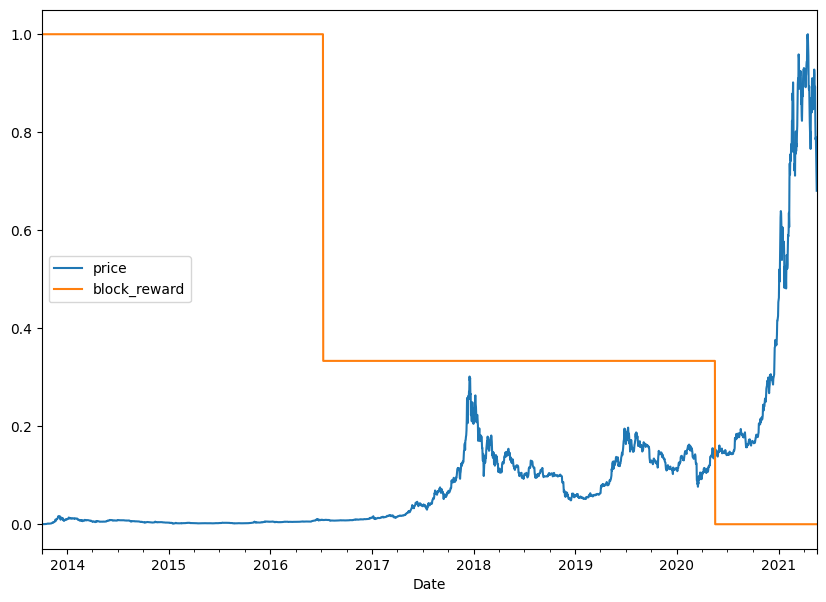

In [ ]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[['price','block_reward']], axis=0),
                                     columns=['price','block_reward'],
                                     index=bitcoin_prices_block.index)

scaled_price_block_df.plot(figsize=(10,7))

## Making a windowed dataset with pandas

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
bitcoin_prices_windowed = bitcoin_prices_block.copy()

In [ ]:
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f'price+{i+1}'] = bitcoin_prices_windowed['price'].shift(periods=i+1)

bitcoin_prices_windowed.head(10)

,price,block_reward,price+1,price+2,price+3,price+4,price+5,price+6,price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [ ]:
X = bitcoin_prices_windowed.dropna().drop('price', axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()['price'].astype(np.float32)

y.head()

,price
Date,
2013-10-08,123.032997
2013-10-09,124.049004
2013-10-10,125.961159
2013-10-11,125.279663
2013-10-12,125.927498


### making train and test sets

In [ ]:
split_size = int(len(X)*0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

## Model 6 Dense (multivariate time series)

In [ ]:
tf.random.set_seed(42)

model_6 = tf_keras.models.Sequential([
                                      tf_keras.layers.Dense(128, activation='relu'),
                                      tf_keras.layers.Dense(HORIZON)
                                      ], name='model_6_multivariate')

model_6.compile(loss='mae',
                optimizer=tf_keras.optimizers.Adam())

model_6.fit(X_train,
            y_train,
            epochs=100,
            verbose=1,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
70/70 [==============================] - 2s 16ms/step - loss: 326.9527 - val_loss: 1044.6072
Epoch 2/100
70/70 [==============================] - 1s 13ms/step - loss: 160.2909 - val_loss: 783.1621
Epoch 3/100
70/70 [==============================] - 1s 11ms/step - loss: 146.5982 - val_loss: 736.1185
Epoch 4/100
70/70 [==============================] - 1s 8ms/step - loss: 136.0407 - val_loss: 675.0472
Epoch 5/100
70/70 [==============================] - 0s 4ms/step - loss: 128.8866 - val_loss: 885.6329
Epoch 6/100
70/70 [==============================] - 0s 4ms/step - loss: 126.4396 - val_loss: 683.7154
Epoch 7/100
70/70 [==============================] - 1s 8ms/step - loss: 124.1460 - val_loss: 619.2364
Epoch 8/100
70/70 [==============================] - 1s 8ms/step - loss: 123.5434 - val_loss: 615.9328
Epoch 9/100
70/70 [==============================] - 0s 4ms/step - loss: 122.5100 - val_loss: 851.6036
Epoch 10/100
70/70 [==============================] - 0s 4ms/step - l

In [ ]:
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 5ms/step - loss: 644.2253


644.2252807617188

In [ ]:
model_6 = tf_keras.models.load_model('model_experiments/model_6_multivariate/')
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 4ms/step - loss: 565.9544


565.9544067382812

In [ ]:
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_results = evaluate_preds(y_true=y_test,
                               y_pred=model_6_preds)
model_6_results

18/18 [==============================] - 0s 3ms/step


{'mae': 565.95447,
 'mse': 1153344.0,
 'rmse': 1073.9385,
 'mape': 2.5265515,
 'mase': 0.99422526}

## Model 7 NBEATS

In [ ]:
class NBeatsBlock(tf_keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    self.hidden = [tf_keras.layers.Dense(n_neurons, activation='relu') for _ in range(n_layers)]
    self.theta_layer = tf_keras.layers.Dense(theta_size, activation='linear', name='theta')

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)

    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]

    return backcast, forecast

In [ ]:
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON,
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)

In [ ]:
print(f'backcast shape: {backcast.shape}, forecast shape: {forecast.shape}')
print(f'backcast: {tf.squeeze(backcast.numpy())}')
print(f'forecast: {tf.squeeze(forecast.numpy())}')

backcast shape: (1, 7), forecast shape: (1, 1)
backcast: [-0.56776065  0.3758068  -0.21323574 -0.3984509  -0.7569893  -0.8086581
 -0.9676094 ]
forecast: -0.2170826643705368


### preparing data for the N-Beats algorithm

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
bitcoin_prices.head()

,price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f'price+{i+1}'] = bitcoin_prices_nbeats['price'].shift(periods=i+1)

bitcoin_prices_nbeats.head(10)

,price,price+1,price+2,price+3,price+4,price+5,price+6,price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [ ]:
X = bitcoin_prices_nbeats.dropna().drop('price', axis=1).astype(np.float32)
y = bitcoin_prices_nbeats.dropna()['price'].astype(np.float32)

split_size = int(len(X)*0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [ ]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))

In [ ]:
test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

In [ ]:
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

### setting up hyperparameters for NBEATS algorithm

In [ ]:
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

### Getting ready for residual connections

In [ ]:
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

subtracted = tf_keras.layers.subtract([tensor_1, tensor_2])
added = tf_keras.layers.add([tensor_1, tensor_2])

print(added.numpy())
print(subtracted.numpy())

[10 12 14 16 18 20 22 24 26 28]
[10 10 10 10 10 10 10 10 10 10]


In [ ]:
%%time

tf.random.set_seed(42)

nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name='initial_block')

stack_input = tf_keras.layers.Input(shape=(INPUT_SIZE), name='stack_input')

residual, forecast = nbeats_block_layer(stack_input)

for i, _ in enumerate(range(N_STACKS-1)):

  backcast, block_forecast = NBeatsBlock(input_size=INPUT_SIZE,
                                         theta_size=THETA_SIZE,
                                         horizon=HORIZON,
                                         n_neurons=N_NEURONS,
                                         n_layers=N_LAYERS,
                                         name=f'NBeatsBlock_{i}'
                                         )(residual)

  residual = tf_keras.layers.subtract([residual, backcast], name=f'subtract_{i}')
  forecast = tf_keras.layers.add([forecast, block_forecast], name=f'add_{i}')


model_7 = tf_keras.models.Model(inputs=stack_input,
                                outputs=forecast,
                                name='model_7_nbeats')

model_7.compile(loss='mae',
                optimizer = tf_keras.optimizers.Adam(0.001))

model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            verbose=1,
            validation_data=test_dataset,
            callbacks=[tf_keras.callbacks.EarlyStopping(monitor='val_loss', patience=200, restore_best_weights=True),
                       tf_keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=100, verbose=1)])

Epoch 1/5000
3/3 [==============================] - 53s 1s/step - loss: 634.9866 - val_loss: 15791.8379 - lr: 0.0010
Epoch 2/5000
3/3 [==============================] - 0s 83ms/step - loss: 1945.8458 - val_loss: 15815.6758 - lr: 0.0010
Epoch 3/5000
3/3 [==============================] - 0s 72ms/step - loss: 2848.2695 - val_loss: 18595.5078 - lr: 0.0010
Epoch 4/5000
3/3 [==============================] - 1s 216ms/step - loss: 2948.6008 - val_loss: 15229.2373 - lr: 0.0010
Epoch 5/5000
3/3 [==============================] - 1s 215ms/step - loss: 2054.2151 - val_loss: 2403.0996 - lr: 0.0010
Epoch 6/5000
3/3 [==============================] - 0s 103ms/step - loss: 1647.4512 - val_loss: 6937.7061 - lr: 0.0010
Epoch 7/5000
3/3 [==============================] - 0s 101ms/step - loss: 1690.3110 - val_loss: 8055.5449 - lr: 0.0010
Epoch 8/5000
3/3 [==============================] - 0s 93ms/step - loss: 889.6844 - val_loss: 7378.2642 - lr: 0.0010
Epoch 9/5000
3/3 [==============================] -

In [ ]:
model_7.evaluate(test_dataset)
model_7_preds = make_preds(model_7, input_data=test_dataset)
model_7_results = evaluate_preds(y_true=y_test,
                               y_pred=model_7_preds)
model_7_results


## Model 8 creating ensemble

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=100,
                        loss_fns=['mae','mse','mape']):
  ensemble_models= []

  for i in range(num_iter):
    for loss_function in loss_fns:
      print(f'Optimizing model by reducing {loss_function} for {num_epochs} epochs, model number {i}')

      model = tf_keras.models.Sequential([
                                          tf_keras.layers.Dense(128, kernel_initializer='he_normal', activation='relu'),
                                          tf_keras.layers.Dense(128, kernel_initializer='he_normal', activation='relu'),
                                          tf_keras.layers.Dense(horizon)
                                          ], name=f'model_{i}')


      model.compile(loss=loss_function,
                    optimizer=tf_keras.optimizers.Adam(),
                    metrics=['mae', 'mse'])

      model.fit(train_data,
                epochs=num_epochs,
                validation_data=test_data,
                verbose=0,
                callbacks=[tf_keras.callbacks.EarlyStopping(monitor='val_loss',
                                                            patience=50,
                                                            restore_best_weights=True),
                           tf_keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                                patience=50,
                                                                verbose=1)])
      ensemble_models.append(model)

  return ensemble_models

In [ ]:
%%time
ensemble_models = get_ensemble_models(num_iter=5)

Optimizing model by reducing mae for 100 epochs, model number 0
Epoch 1/100
3/3 [==============================] - 2s 70ms/step - loss: 3652.6365 - mae: 3652.6365 - mse: 30173122.0000 - val_loss: 6849.6768 - val_mae: 6849.6768 - val_mse: 84763864.0000 - lr: 0.0010
Epoch 2/100
3/3 [==============================] - 0s 14ms/step - loss: 447.2382 - mae: 447.2382 - mse: 854738.6250 - val_loss: 4884.6426 - val_mae: 4884.6426 - val_mse: 46271528.0000 - lr: 0.0010
Epoch 3/100
3/3 [==============================] - 0s 13ms/step - loss: 640.8179 - mae: 640.8179 - mse: 1169513.5000 - val_loss: 1756.3188 - val_mae: 1756.3188 - val_mse: 7122528.5000 - lr: 0.0010
Epoch 4/100
3/3 [==============================] - 0s 13ms/step - loss: 796.1896 - mae: 796.1896 - mse: 1892181.8750 - val_loss: 5764.4292 - val_mae: 5764.4292 - val_mse: 60364996.0000 - lr: 0.0010
Epoch 5/100
3/3 [==============================] - 0s 13ms/step - loss: 694.0159 - mae: 694.0159 - mse: 1257253.1250 - val_loss: 986.6258 - val

In [ ]:
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    ensemble_preds.append(model.predict(data))
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models, data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 88ms/step


1/1 [==============================] - 0s 79ms/step


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 9238.614,  8864.066,  8889.68 , ..., 49733.83 , 51596.773,
        49629.83 ],
       [ 8959.174,  8934.428,  9050.955, ..., 50440.266, 47497.46 ,
        45527.664],
       [ 8832.907,  8770.632,  8991.56 , ..., 49762.688, 48646.082,
        46673.09 ],
       ...,
       [ 8974.361,  8878.4  ,  8965.565, ..., 48618.445, 48806.73 ,
        46765.09 ],
       [ 9074.741,  8906.624,  8928.052, ..., 49517.938, 49655.54 ,
        47534.914],
       [ 9113.571,  8740.849,  8713.591, ..., 48016.55 , 48231.566,
        46858.582]], dtype=float32)>

In [ ]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_median =  np.median(ensemble_preds, axis=0)

In [ ]:
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_mean)
ensemble_results

{'mae': 598.86115,
 'mse': 1253313.9,
 'rmse': 1119.515,
 'mape': 2.6942348,
 'mase': 1.0520332}

In [ ]:
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_median)
ensemble_results

{'mae': 595.6856,
 'mse': 1245583.5,
 'rmse': 1116.0571,
 'mape': 2.6928496,
 'mase': 1.0464547}

### Plotting the prediction intervals (uncertainty estimates) of our ensemble

In [ ]:
def get_upper_lower(preds):

  std = tf.math.reduce_std(preds, axis=0)
  upper = tf.reduce_mean(preds,axis=0) + 1.96*std
  lower = tf.reduce_mean(preds,axis=0) - 1.96*std

  return upper, lower

In [ ]:
upper, lower = get_upper_lower(ensemble_preds)

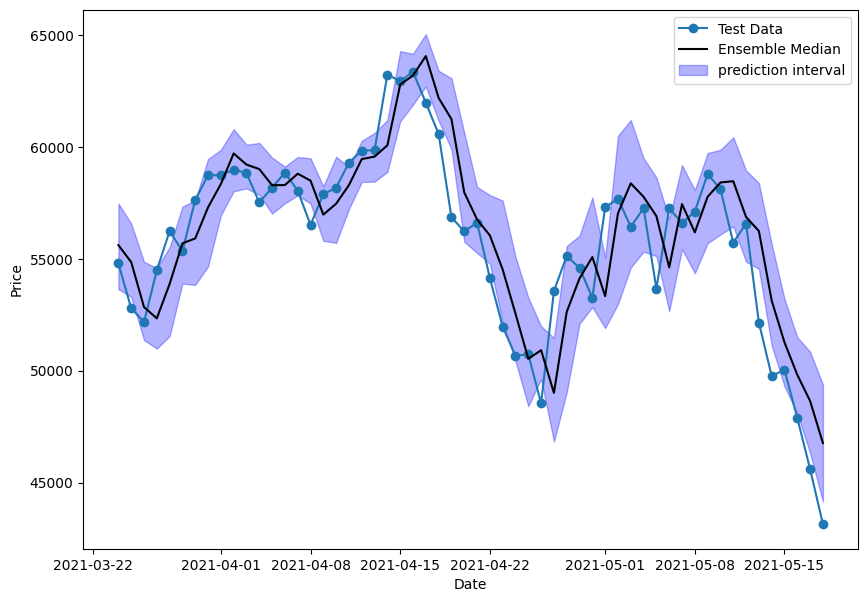

In [ ]:
ensemble_median = np.median(ensemble_preds, axis=0)

offset=500
plt.figure(figsize=(10,7))
plt.plot(X_test.index[offset:], y_test[offset:], 'o-', label='Test Data')
plt.plot(X_test.index[offset:], ensemble_median[offset:], 'k-', label='Ensemble Median')
plt.xlabel('Date')
plt.ylabel('Price')
plt.fill_between(X_test.index[offset:], upper[offset:], lower[offset:], color='b', alpha=0.3, label='prediction interval')
plt.legend()

## Model 9: making predictions into the future

In [ ]:
bitcoin_prices_windowed.head()

,price,block_reward,price+1,price+2,price+3,price+4,price+5,price+6,price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
X_all = bitcoin_prices_windowed.dropna().drop(['price','block_reward'], axis=1).to_numpy()
y_all = bitcoin_prices_windowed.dropna()['price'].to_numpy()

len(X_all), len(y_all)

(2780, 2780)

In [ ]:
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

BATCH_SIZE=1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
tf.random.set_seed(42)

model_9 = tf_keras.models.Sequential([
                                      tf_keras.layers.Dense(128, activation='relu'),
                                      tf_keras.layers.Dense(128, activation='relu'),
                                      tf_keras.layers.Dense(HORIZON)
                                      ], name='model_9_future')

model_9.compile(loss='mae',
                optimizer=tf_keras.optimizers.Adam())

model_9.fit(dataset_all,
            epochs=100,
            verbose=1)

Epoch 1/100
3/3 [==============================] - 2s 28ms/step - loss: 4010.2112
Epoch 2/100
3/3 [==============================] - 0s 20ms/step - loss: 1998.0637
Epoch 3/100
3/3 [==============================] - 0s 17ms/step - loss: 432.8083
Epoch 4/100
3/3 [==============================] - 0s 21ms/step - loss: 1144.9629
Epoch 5/100
3/3 [==============================] - 0s 19ms/step - loss: 987.2565
Epoch 6/100
3/3 [==============================] - 0s 19ms/step - loss: 404.2529
Epoch 7/100
3/3 [==============================] - 0s 20ms/step - loss: 660.4650
Epoch 8/100
3/3 [==============================] - 0s 21ms/step - loss: 659.0211
Epoch 9/100
3/3 [==============================] - 0s 23ms/step - loss: 374.1227
Epoch 10/100
3/3 [==============================] - 0s 30ms/step - loss: 501.0808
Epoch 11/100
3/3 [==============================] - 0s 36ms/step - loss: 485.1242
Epoch 12/100
3/3 [==============================] - 0s 36ms/step - loss: 361.7046
Epoch 13/100
3/3 [====

### make predictions into the future

In [ ]:
INTO_FUTURE = 14

In [ ]:
def make_future_forecast(values, model, into_future=INTO_FUTURE, window_size=WINDOW_SIZE):

  future_forecast = []
  last_window = values[-window_size:]

  for _ in range(into_future):
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f'predicting on:\n {last_window} -> prediction {tf.squeeze(future_pred).numpy()}')

    future_forecast.append(tf.squeeze(future_pred).numpy())
    last_window = np.append(last_window, future_pred)[-window_size:]

  return future_forecast

In [ ]:
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 31ms/step
predicting on:
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> prediction 55088.515625
1/1 [==============================] - 0s 30ms/step
predicting on:
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55088.515625  ] -> prediction 52023.88671875
1/1 [==============================] - 0s 34ms/step
predicting on:
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55088.515625   52023.88671875] -> prediction 49877.265625
1/1 [==============================] - 0s 41ms/step
predicting on:
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55088.515625   52023.88671875 49877.265625  ] -> prediction 48894.30859375
1/1 [==============================] - 0s 41ms/step
predicting on:
 [47885.62525472 45604.61575361 43144.47129086 55088.515625
 52023.88671875 49877.265625   48894.30859375] -> predict

In [ ]:
def get_future_dates(start_date, into_future=INTO_FUTURE, offset=1):


  start_date = start_date + np.timedelta64(offset, 'D')
  end_date = start_date + np.timedelta64(into_future, 'D')

  return np.arange(start_date, end_date, dtype='datetime64[D]')

In [ ]:
last_timestep = bitcoin_prices.index[-1]

In [ ]:
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE,
                                   offset=1)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [ ]:
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, bitcoin_prices['price'][-1])

next_time_steps, future_forecast

<ipython-input-135-d4cb5935e4e1>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  future_forecast = np.insert(future_forecast, 0, bitcoin_prices['price'][-1])


(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55088.516, 52023.887, 49877.266, 48894.31 , 44544.29 ,
        47187.297, 46943.316, 54257.945, 51989.945, 48168.84 , 47449.87 ,
        43858.4  , 48819.902, 49801.996], dtype=float32))

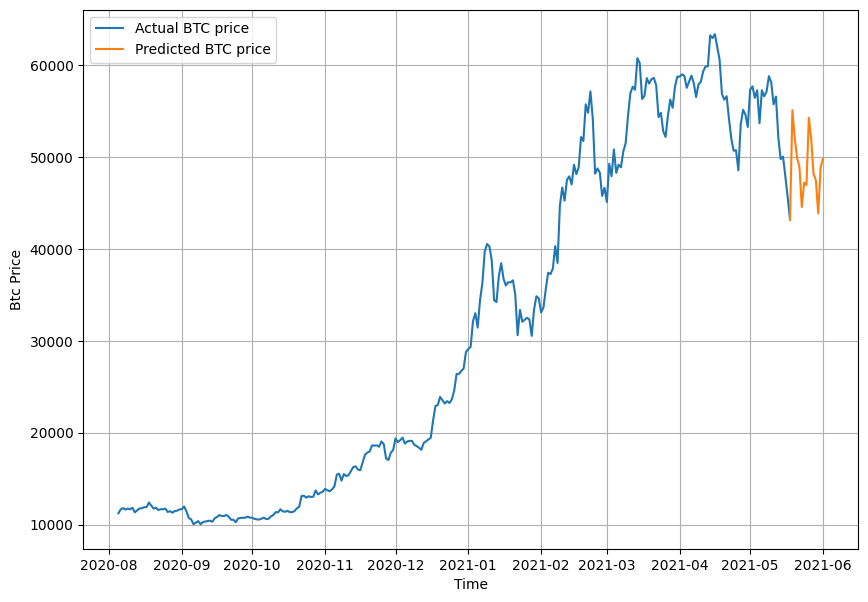

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(bitcoin_prices.index, bitcoin_prices, start=2500, format = '-', label='Actual BTC price')
plot_time_series(next_time_steps, future_forecast, format='-', label='Predicted BTC price')
plt.legend()

## Model 10: the turkey problem

In [ ]:
btc_price_turkey = bitcoin_prices.copy()

In [ ]:
btc_price_turkey[-1] = btc_price_turkey[-1]/100

<ipython-input-148-ea9352229575>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  btc_price_turkey[-1] = btc_price_turkey[-1]/100
<ipython-input-148-ea9352229575>:1: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  btc_price_turkey[-1] = btc_price_turkey[-1]/100


In [ ]:
btc_price_turkey.index

DatetimeIndex(['2013-10-01', '2013-10-02', '2013-10-03', '2013-10-04',
               '2013-10-05', '2013-10-06', '2013-10-07', '2013-10-08',
               '2013-10-09', '2013-10-10',
               ...
               '2021-05-09', '2021-05-10', '2021-05-11', '2021-05-12',
               '2021-05-13', '2021-05-14', '2021-05-15', '2021-05-16',
               '2021-05-17', '2021-05-18'],
              dtype='datetime64[ns]', name='Date', length=2787, freq=None)

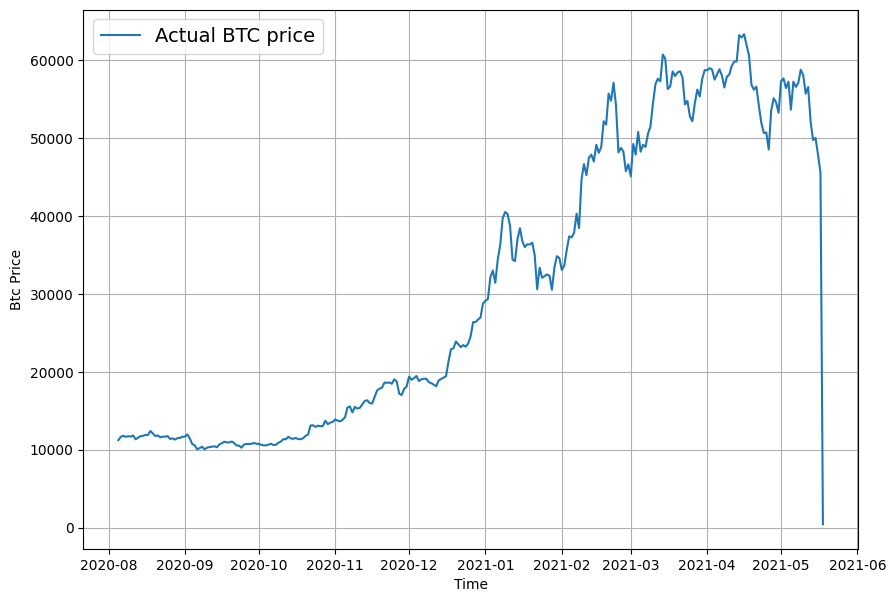

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(btc_price_turkey.index, btc_price_turkey, format='-', label='Actual BTC price', start=2500)

In [ ]:
HORIZON=1
WINDOW_SIZE=7

In [ ]:
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)

In [ ]:
tf.random.set_seed(42)

model_10 = tf_keras.Sequential([
    tf_keras.layers.Dense(128, activation='relu'),
    tf_keras.layers.Dense(HORIZON, activation='linear'),
], name = 'model_10_turkey')

model_10.compile(loss='mae',
                optimizer=tf_keras.optimizers.Adam(),
                metrics=['mae', 'mse'])

model_10.fit(X_train,
             y_train,
             epochs=100,
             verbose=1,
             batch_size=128,
             validation_data=(X_test,y_test),
             callbacks=[create_model_checkpoint(model_name=model_10.name)]
             )

Epoch 1/100
18/18 [==============================] - 3s 119ms/step - loss: 1004.5799 - mae: 1004.5799 - mse: 3783077.7500 - val_loss: 2910.6426 - val_mae: 2910.6426 - val_mse: 24789474.0000
Epoch 2/100
18/18 [==============================] - 3s 156ms/step - loss: 297.2283 - mae: 297.2283 - mse: 396849.2812 - val_loss: 1234.6082 - val_mae: 1234.6082 - val_mse: 9204602.0000
Epoch 3/100
18/18 [==============================] - 1s 42ms/step - loss: 218.2744 - mae: 218.2744 - mse: 223721.0781 - val_loss: 1184.7885 - val_mae: 1184.7885 - val_mse: 8477655.0000
Epoch 4/100
18/18 [==============================] - 1s 40ms/step - loss: 196.9371 - mae: 196.9371 - mse: 200877.7500 - val_loss: 1120.9828 - val_mae: 1120.9828 - val_mse: 8201527.5000
Epoch 5/100
18/18 [==============================] - 1s 36ms/step - loss: 188.6651 - mae: 188.6651 - mse: 187357.2812 - val_loss: 1104.5027 - val_mae: 1104.5027 - val_mse: 7846213.0000
Epoch 6/100
18/18 [==============================] - 1s 45ms/step - l

In [ ]:
model_10.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 649.9149 - mae: 649.9149 - mse: 4838565.0000


[649.9149169921875, 649.9148559570312, 4838565.0]

In [ ]:
turkey_model = tf_keras.models.load_model('model_experiments/model_10_turkey/')
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 5ms/step - loss: 643.9800 - mae: 643.9800 - mse: 4840975.0000


[643.97998046875, 643.97998046875, 4840975.0]

In [ ]:
turkey_model_preds = tf.squeeze(turkey_model.predict(X_test))
turkey_model_results = evaluate_preds(y_true=y_test,
                                     y_pred=turkey_model_preds)
turkey_model_results

18/18 [==============================] - 0s 4ms/step


{'mae': 17143.246,
 'mse': 615391940.0,
 'rmse': 23740.264,
 'mape': 121.55335,
 'mase': 26.52923}

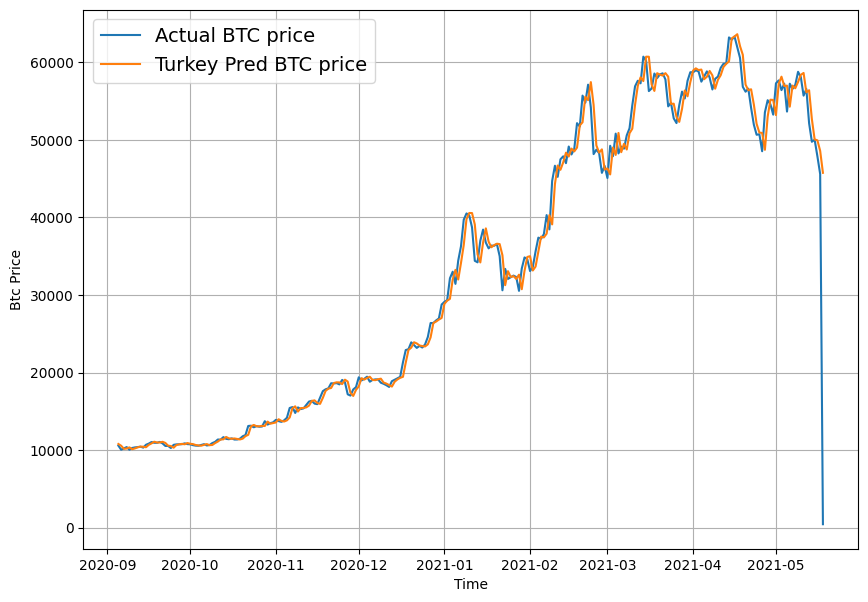

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=btc_price_turkey.index[-len(X_test):],
                 values=btc_price_turkey[-len(X_test):],
                 format='-',
                 label='Actual BTC price',
                 start=300)

plot_time_series(timesteps=btc_price_turkey.index[-len(X_test):],
                 values=turkey_model_preds,
                 format='-',
                 label='Turkey Pred BTC price',
                 start=300)